In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas._libs.tslibs.timestamps import Timestamp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Fisrt step:

Have a quick look on the available datasets, so we can affer which ones are of interest.



## Patient

In [2]:
url_patient = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/PatientInfo.csv'
df_patient = pd.read_csv(url_patient)
df_patient

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [ ]:
df_columns = list(df_patient.columns)
for col in df_patient.columns:
    print('{} : {}'.format(col,df_patient[col].unique()))


patient_id : [1000000001 1000000002 1000000003 ... 7000000017 7000000018 7000000019]
sex : ['male' 'female' nan]
age : ['50s' '30s' '20s' '60s' '80s' '70s' '40s' '10s' '90s' '0s' nan '100s']
country : ['Korea' 'China' 'United States' 'France' 'Thailand' 'Canada' 'India'
 'Switzerland' 'Germany' 'Indonesia' 'Vietnam' 'Foreign' 'Mongolia'
 'United Kingdom' 'Spain' 'Bangladesh']
province : ['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Gyeonggi-do'
 'Sejong' 'Ulsan' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']
city : ['Gangseo-gu' 'Jungnang-gu' 'Jongno-gu' 'Mapo-gu' 'Seongbuk-gu' 'etc'
 'Songpa-gu' 'Seodaemun-gu' 'Seongdong-gu' 'Seocho-gu' 'Guro-gu'
 'Gangdong-gu' 'Eunpyeong-gu' 'Geumcheon-gu' 'Gwanak-gu' 'Nowon-gu'
 'Dongjak-gu' 'Gangnam-gu' 'Yangcheon-gu' 'Gwangjin-gu' 'Dongdaemun-gu'
 'Yeongdeungpo-gu' 'Dobong-gu' 'Yongsan-gu' 'Gangbuk-gu' 'Jung-gu'
 'Dongnae-gu' 'Haeundae-gu' 'Yeonje-gu' 

From patient we just want gender, age, confirmed date, released date and deceased date.

In [3]:
df_patient_to_use = df_patient[['sex','age','confirmed_date','released_date','deceased_date','state']]

In [4]:
df_patient_to_use['state'].value_counts()

released    2929
isolated    2158
deceased      78
Name: state, dtype: int64

In [5]:
df_patient_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             4043 non-null   object
 1   age             3785 non-null   object
 2   confirmed_date  5162 non-null   object
 3   released_date   1587 non-null   object
 4   deceased_date   66 non-null     object
 5   state           5165 non-null   object
dtypes: object(6)
memory usage: 242.2+ KB


In [6]:
df_patient_to_use = df_patient_to_use.fillna('-')

# Handling Age

In [7]:
df_patient_to_use['age'].value_counts()

-       1380
20s      899
50s      667
30s      523
40s      518
60s      482
70s      232
10s      178
80s      170
0s        66
90s       49
100s       1
Name: age, dtype: int64

In [8]:
def get_decade(value):
  num_digits = len(value)
  answer = value[0]
  if (num_digits == 1 and value != '-'):
    return '0'
  elif (value == '-'):
    return value
  else:
    return answer + '0'

df_patient_to_use['age_group'] = df_patient_to_use['age'].apply(get_decade)
df_patient_to_use = df_patient_to_use.drop(['age'], axis =1)

df_patient_to_use = df_patient_to_use[df_patient_to_use['age_group'] != '-']
df_patient_to_use

,sex,confirmed_date,released_date,deceased_date,state,age_group
0,male,2020-01-23,2020-02-05,-,released,50
1,male,2020-01-30,2020-03-02,-,released,30
2,male,2020-01-30,2020-02-19,-,released,50
3,male,2020-01-30,2020-02-15,-,released,20
4,female,2020-01-31,2020-02-24,-,released,20
...,...,...,...,...,...,...
5156,male,2020-04-03,2020-05-19,-,released,30
5157,female,2020-04-03,2020-05-05,-,released,20
5158,female,2020-04-14,2020-04-26,-,released,10
5159,female,2020-05-09,2020-06-12,-,released,30


# Handling Sex

In [9]:
def get_sex(value):
  if value == 'male':
    return 0
  elif value == 'female':
    return 1
  else:
    return value

df_patient_to_use['gender'] = df_patient_to_use['sex'].apply(get_sex)
df_patient_to_use = df_patient_to_use.drop(['sex'], axis =1)

df_patient_to_use

,confirmed_date,released_date,deceased_date,state,age_group,gender
0,2020-01-23,2020-02-05,-,released,50,0
1,2020-01-30,2020-03-02,-,released,30,0
2,2020-01-30,2020-02-19,-,released,50,0
3,2020-01-30,2020-02-15,-,released,20,0
4,2020-01-31,2020-02-24,-,released,20,1
...,...,...,...,...,...,...
5156,2020-04-03,2020-05-19,-,released,30,0
5157,2020-04-03,2020-05-05,-,released,20,1
5158,2020-04-14,2020-04-26,-,released,10,1
5159,2020-05-09,2020-06-12,-,released,30,1


# Handling Status

In [10]:
df_patient_to_use['state'].value_counts()

released    2498
isolated    1212
deceased      75
Name: state, dtype: int64

In [11]:
df_patient_to_use = df_patient_to_use.replace('isolated','-')


def is_dead(status):
  if status == 'released':
    return 0
  elif status == 'deceased':
    return 1
  else:
    return status

df_patient_to_use['status'] = df_patient_to_use['state'].apply(is_dead)
df_patient_to_use = df_patient_to_use.drop(['state'], axis =1)
df_patient_to_use

,confirmed_date,released_date,deceased_date,age_group,gender,status
0,2020-01-23,2020-02-05,-,50,0,0
1,2020-01-30,2020-03-02,-,30,0,0
2,2020-01-30,2020-02-19,-,50,0,0
3,2020-01-30,2020-02-15,-,20,0,0
4,2020-01-31,2020-02-24,-,20,1,0
...,...,...,...,...,...,...
5156,2020-04-03,2020-05-19,-,30,0,0
5157,2020-04-03,2020-05-05,-,20,1,0
5158,2020-04-14,2020-04-26,-,10,1,0
5159,2020-05-09,2020-06-12,-,30,1,0


# Handling Dates

In [12]:
datasEncerramento = list(df_patient_to_use['released_date'])
datasObito = list(df_patient_to_use['deceased_date'])
status = list(df_patient_to_use['status'])


datasFinais = []
statusFinais = []
for i in range(len(datasObito)):
  if datasEncerramento[i] != '-' and datasObito[i] != '-':
    datasFinais.append(datasObito[i])
  elif datasEncerramento[i] == '-' and datasObito[i] != '-':
    datasFinais.append(datasObito[i])
  elif datasEncerramento[i] != '-' and datasObito[i] == '-':
    datasFinais.append(datasEncerramento[i])
  else:
    datasFinais.append('-')
    statusFinais.append('-')


df_patient_to_use['final_date'] = datasFinais

df_patient_to_use = df_patient_to_use.drop(['released_date','deceased_date'], axis=1)


df_patient_to_use

,confirmed_date,age_group,gender,status,final_date
0,2020-01-23,50,0,0,2020-02-05
1,2020-01-30,30,0,0,2020-03-02
2,2020-01-30,50,0,0,2020-02-19
3,2020-01-30,20,0,0,2020-02-15
4,2020-01-31,20,1,0,2020-02-24
...,...,...,...,...,...
5156,2020-04-03,30,0,0,2020-05-19
5157,2020-04-03,20,1,0,2020-05-05
5158,2020-04-14,10,1,0,2020-04-26
5159,2020-05-09,30,1,0,2020-06-12


In [16]:
df_final = df_patient_to_use[df_patient_to_use['final_date'] != '-']
df_final = df_final[df_final['status'] != '-']
df_final

,confirmed_date,age_group,gender,status,final_date
0,2020-01-23,50,0,0,2020-02-05
1,2020-01-30,30,0,0,2020-03-02
2,2020-01-30,50,0,0,2020-02-19
3,2020-01-30,20,0,0,2020-02-15
4,2020-01-31,20,1,0,2020-02-24
...,...,...,...,...,...
5156,2020-04-03,30,0,0,2020-05-19
5157,2020-04-03,20,1,0,2020-05-05
5158,2020-04-14,10,1,0,2020-04-26
5159,2020-05-09,30,1,0,2020-06-12


In [17]:
from datetime import datetime

datasDiagnostico = list(df_final['confirmed_date'])
datasFinais = list(df_final['final_date'])

numDias = []

for i in range(len(datasDiagnostico)):
  date_format = "%Y-%m-%d"
  a = datetime.strptime(datasDiagnostico[i], date_format)
  b = datetime.strptime(datasFinais[i], date_format)
  delta = b - a
  numDias.append(delta.days)

In [18]:
df_final['NumDias'] = numDias
df_final

,confirmed_date,age_group,gender,status,final_date,NumDias
0,2020-01-23,50,0,0,2020-02-05,13
1,2020-01-30,30,0,0,2020-03-02,32
2,2020-01-30,50,0,0,2020-02-19,20
3,2020-01-30,20,0,0,2020-02-15,16
4,2020-01-31,20,1,0,2020-02-24,24
...,...,...,...,...,...,...
5156,2020-04-03,30,0,0,2020-05-19,46
5157,2020-04-03,20,1,0,2020-05-05,32
5158,2020-04-14,10,1,0,2020-04-26,12
5159,2020-05-09,30,1,0,2020-06-12,34


In [19]:
df_final['NumDias'].describe()

count    1635.000000
mean       24.230581
std        13.360139
min        -1.000000
25%        16.000000
50%        22.000000
75%        31.000000
max       114.000000
Name: NumDias, dtype: float64

In [20]:
df_final = df_final[df_final['NumDias'] != -1]
df_final

,confirmed_date,age_group,gender,status,final_date,NumDias
0,2020-01-23,50,0,0,2020-02-05,13
1,2020-01-30,30,0,0,2020-03-02,32
2,2020-01-30,50,0,0,2020-02-19,20
3,2020-01-30,20,0,0,2020-02-15,16
4,2020-01-31,20,1,0,2020-02-24,24
...,...,...,...,...,...,...
5156,2020-04-03,30,0,0,2020-05-19,46
5157,2020-04-03,20,1,0,2020-05-05,32
5158,2020-04-14,10,1,0,2020-04-26,12
5159,2020-05-09,30,1,0,2020-06-12,34


In [21]:
df_final['NumDias'].describe()

count    1633.000000
mean       24.261482
std        13.339077
min         0.000000
25%        16.000000
50%        22.000000
75%        31.000000
max       114.000000
Name: NumDias, dtype: float64

# other stuff

In [ ]:
df_patient_to_use.value_counts()

patient_id  sex     age  province          confirmed_date  released_date  deceased_date
6001000223  female  80s  Gyeongsangbuk-do  2020-03-02      2020-03-30     2020-04-08       1
6001000349  female  70s  Gyeongsangbuk-do  2020-03-05      2020-05-08     2020-05-11       1
dtype: int64

There were only 2 patients that were released and later have deceased. So they will be removed from the dataset temporarly.

In [ ]:
df_patient_to_use = df_patient_to_use.loc[df_patient_to_use["patient_id"] != 6001000223]
df_patient_to_use = df_patient_to_use.loc[df_patient_to_use["patient_id"] != 6001000349]

Given the fact that we're focusing on monitoring patients at home 'deceased_date' will be removed.

In [ ]:
df_patient_to_use = df_patient[['patient_id','sex','age','province','confirmed_date','released_date']]

Now we will remove all the NaN

In [ ]:
df_patient_to_use = df_patient_to_use.dropna()

In [ ]:
df_patient_to_use[['confirmed_date','released_date']] = df_patient_to_use[['confirmed_date','released_date']].apply(pd.to_datetime)

In [ ]:
df_patient_to_use['num_days'] = (df_patient_to_use['released_date'] - df_patient_to_use['confirmed_date']).dt.days

In [ ]:
df_patient_to_use

,patient_id,sex,age,province,confirmed_date,released_date,num_days
0,1000000001,male,50s,Seoul,2020-01-23,2020-02-05,13
1,1000000002,male,30s,Seoul,2020-01-30,2020-03-02,32
2,1000000003,male,50s,Seoul,2020-01-30,2020-02-19,20
3,1000000004,male,20s,Seoul,2020-01-30,2020-02-15,16
4,1000000005,female,20s,Seoul,2020-01-31,2020-02-24,24
...,...,...,...,...,...,...,...
5156,7000000011,male,30s,Jeju-do,2020-04-03,2020-05-19,46
5157,7000000012,female,20s,Jeju-do,2020-04-03,2020-05-05,32
5158,7000000013,female,10s,Jeju-do,2020-04-14,2020-04-26,12
5159,7000000014,female,30s,Jeju-do,2020-05-09,2020-06-12,34


Now, let's perform some statistics:

In [ ]:
df_patient_to_use['num_days'].describe()

count    1576.000000
mean       24.809010
std        13.051875
min         0.000000
25%        16.000000
50%        23.000000
75%        31.000000
max       114.000000
Name: num_days, dtype: float64

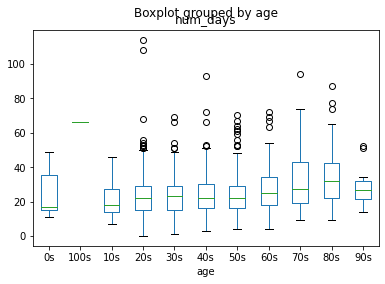

In [ ]:
df_patient_to_use.boxplot(by ='age', column =['num_days'], grid = False)

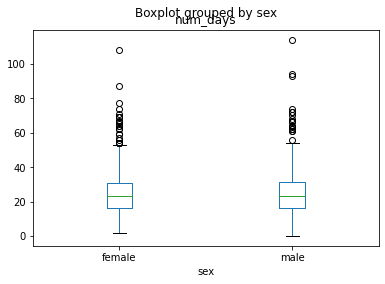

In [ ]:
df_patient_to_use.boxplot(by ='sex', column =['num_days'], grid = False)

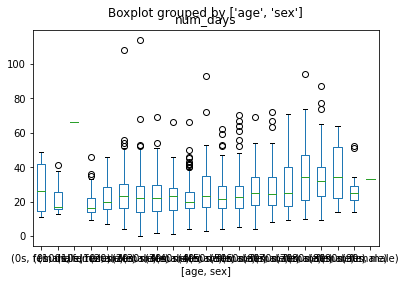

In [ ]:
df_patient_to_use.boxplot(by =['age','sex'], column =['num_days'], grid = False)

## Age Time Series

In [ ]:
url_timeseriesAge = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/TimeAge.csv'
df_timeseriesAge = pd.read_csv(url_timeseriesAge)
df_timeseriesAge = df_timeseriesAge.dropna()
df_timeseriesAge

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


Dropping column 'time':

In [ ]:
df_timeseriesAge = df_timeseriesAge[['date','age','confirmed','deceased']]
df_timeseriesAge

,date,age,confirmed,deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1
...,...,...,...,...
1084,2020-06-30,40s,1681,3
1085,2020-06-30,50s,2286,15
1086,2020-06-30,60s,1668,41
1087,2020-06-30,70s,850,82


## Gender Time Series

In [ ]:
url_timeseriesGender = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/TimeGender.csv'
df_timeseriesGender = pd.read_csv(url_timeseriesGender)
df_timeseriesGender = df_timeseriesGender.dropna()
df_timeseriesGender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


Dropping column 'time':

In [ ]:
df_timeseriesGender = df_timeseriesGender[['date','sex','confirmed','deceased']]
df_timeseriesGender

,date,sex,confirmed,deceased
0,2020-03-02,male,1591,13
1,2020-03-02,female,2621,9
2,2020-03-03,male,1810,16
3,2020-03-03,female,3002,12
4,2020-03-04,male,1996,20
...,...,...,...,...
237,2020-06-28,female,7265,131
238,2020-06-29,male,5470,151
239,2020-06-29,female,7287,131
240,2020-06-30,male,5495,151


## Weather

In [ ]:
url_weather = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/Weather.csv'
df_weather = pd.read_csv(url_weather)
df_weather = df_weather.dropna()
df_weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [ ]:
df_weather.sort_values(by='date',ascending=False)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
26270,70000,Jeju-do,2020-06-29,23.2,19.1,27.6,25.1,12.8,270.0,87.4
26262,20000,Gyeonggi-do,2020-06-29,22.7,17.3,26.8,29.5,6.1,110.0,84.3
26255,10000,Seoul,2020-06-29,23.8,20.6,26.5,11.9,5.9,50.0,77.0
26256,11000,Busan,2020-06-29,21.6,18.9,25.2,99.2,7.2,90.0,90.9
26257,12000,Daegu,2020-06-29,22.1,19.8,26.8,42.2,6.1,110.0,82.0
...,...,...,...,...,...,...,...,...,...,...
12,51000,Jeollanam-do,2016-01-01,4.5,0.6,8.7,0.0,6.9,320.0,54.5
13,60000,Gyeongsangbuk-do,2016-01-01,3.5,-2.1,8.2,0.0,8.6,270.0,47.6
14,61000,Gyeongsangnam-do,2016-01-01,2.5,-2.0,7.9,0.0,4.3,20.0,59.1
15,70000,Jeju-do,2016-01-01,8.2,5.2,10.8,0.0,3.7,180.0,60.1


We're only interested in 2020 or further.

In [ ]:
df_weather = df_weather[df_weather.date >= '2020-01-01']
df_weather['date'] = df_weather['date'].apply(pd.to_datetime)
df_weather.sort_values(by='date',ascending=False)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
26270,70000,Jeju-do,2020-06-29,23.2,19.1,27.6,25.1,12.8,270.0,87.4
26262,20000,Gyeonggi-do,2020-06-29,22.7,17.3,26.8,29.5,6.1,110.0,84.3
26255,10000,Seoul,2020-06-29,23.8,20.6,26.5,11.9,5.9,50.0,77.0
26256,11000,Busan,2020-06-29,21.6,18.9,25.2,99.2,7.2,90.0,90.9
26257,12000,Daegu,2020-06-29,22.1,19.8,26.8,42.2,6.1,110.0,82.0
...,...,...,...,...,...,...,...,...,...,...
23387,51000,Jeollanam-do,2020-01-01,1.2,-4.1,6.4,0.0,7.7,320.0,51.1
23388,60000,Gyeongsangbuk-do,2020-01-01,0.2,-5.7,5.8,0.0,8.0,270.0,50.3
23389,61000,Gyeongsangnam-do,2020-01-01,0.3,-4.7,4.9,0.0,4.7,50.0,45.4
23390,70000,Jeju-do,2020-01-01,5.2,2.4,7.3,0.0,4.9,320.0,62.9


In [ ]:
df_weather.province.value_counts()

Seoul                181
Chungcheongnam-do    181
Jeju-do              181
Gyeongsangnam-do     181
Gyeongsangbuk-do     181
Jeollanam-do         181
Jeollabuk-do         181
Gangwon-do           181
Gyeonggi-do          181
Ulsan                181
Daejeon              181
Incheon              181
Gwangju              181
Daegu                181
Busan                180
Chungcheongbuk-do    152
Chunghceongbuk-do     29
Name: province, dtype: int64

Spliting the dataframe by province

In [ ]:
df_W_Seoul = df_weather[df_weather.province == 'Seoul']
df_W_Chungcheongnamdo = df_weather[df_weather.province == 'Chungcheongnam-do']
df_W_Jejudo = df_weather[df_weather.province == 'Jeju-do']
df_W_Gyeongsangnamdo = df_weather[df_weather.province == 'Gyeongsangnam-do']
df_W_Gyeongsangbukdo = df_weather[df_weather.province == 'Gyeongsangbuk-do']
df_W_Jeollanamdo = df_weather[df_weather.province == 'Jeollanam-do']
df_W_Jeollabukdo = df_weather[df_weather.province == 'Jeollabuk-do']
df_W_Gangwondo = df_weather[df_weather.province == 'Gangwon-do']
df_W_Gyeonggido = df_weather[df_weather.province == 'Gyeonggi-do']
df_W_Ulsan = df_weather[df_weather.province == 'Ulsan']
df_W_Daejeon = df_weather[df_weather.province == 'Daejeon']
df_W_Incheon = df_weather[df_weather.province == 'Incheon']
df_W_Gwangju = df_weather[df_weather.province == 'Gwangju']
df_W_Daegu = df_weather[df_weather.province == 'Daegu']
df_W_Busan = df_weather[df_weather.province == 'Busan']
df_W_Chungcheongbukdo = df_weather[df_weather.province == 'Chungcheongbuk-do']
df_W_Chunghceongbukdo = df_weather[df_weather.province == 'Chunghceongbuk-do']

In [ ]:
df_patient_to_use

,patient_id,sex,age,province,confirmed_date,released_date,num_days
0,1000000001,male,50s,Seoul,2020-01-23,2020-02-05,13
1,1000000002,male,30s,Seoul,2020-01-30,2020-03-02,32
2,1000000003,male,50s,Seoul,2020-01-30,2020-02-19,20
3,1000000004,male,20s,Seoul,2020-01-30,2020-02-15,16
4,1000000005,female,20s,Seoul,2020-01-31,2020-02-24,24
...,...,...,...,...,...,...,...
5156,7000000011,male,30s,Jeju-do,2020-04-03,2020-05-19,46
5157,7000000012,female,20s,Jeju-do,2020-04-03,2020-05-05,32
5158,7000000013,female,10s,Jeju-do,2020-04-14,2020-04-26,12
5159,7000000014,female,30s,Jeju-do,2020-05-09,2020-06-12,34


Split the dataframe by province

In [ ]:
df_Seoul = df_patient_to_use[df_patient_to_use.province == 'Seoul']
df_Chungcheongnamdo = df_patient_to_use[df_patient_to_use.province == 'Chungcheongnam-do']
df_Jejudo = df_patient_to_use[df_patient_to_use.province == 'Jeju-do']
df_Gyeongsangnamdo = df_patient_to_use[df_patient_to_use.province == 'Gyeongsangnam-do']
df_Gyeongsangbukdo = df_patient_to_use[df_patient_to_use.province == 'Gyeongsangbuk-do']
df_Jeollanamdo = df_patient_to_use[df_patient_to_use.province == 'Jeollanam-do']
df_Jeollabukdo = df_patient_to_use[df_patient_to_use.province == 'Jeollabuk-do']
df_Gangwondo = df_patient_to_use[df_patient_to_use.province == 'Gangwon-do']
df_Gyeonggido = df_patient_to_use[df_patient_to_use.province == 'Gyeonggi-do']
df_Ulsan = df_patient_to_use[df_patient_to_use.province == 'Ulsan']
df_Daejeon = df_patient_to_use[df_patient_to_use.province == 'Daejeon']
df_Incheon = df_patient_to_use[df_patient_to_use.province == 'Incheon']
df_Gwangju = df_patient_to_use[df_patient_to_use.province == 'Gwangju']
df_Daegu = df_patient_to_use[df_patient_to_use.province == 'Daegu']
df_Busan = df_patient_to_use[df_patient_to_use.province == 'Busan']
df_Chungcheongbukdo = df_patient_to_use[df_patient_to_use.province == 'Chungcheongbuk-do']
df_Chunghceongbukdo = df_patient_to_use[df_patient_to_use.province == 'Chunghceongbuk-do']

In [ ]:
seoul_start_date = df_Seoul.confirmed_date
seoul_end_date = df_Seoul.released_date

Chungcheongnamdo_start_date = df_Chungcheongnamdo.confirmed_date
Chungcheongnamdo_end_date = df_Chungcheongnamdo.released_date

Jejudo_start_date = df_Jejudo.confirmed_date
Jejudo_end_date = df_Jejudo.released_date

Gyeongsangnamdo_start_date = df_Gyeongsangnamdo.confirmed_date
Gyeongsangnamdo_end_date = df_Gyeongsangnamdo.released_date

Gyeongsangbukdo_start_date = df_Gyeongsangbukdo.confirmed_date
Gyeongsangbukdo_end_date = df_Gyeongsangbukdo.released_date

Jeollanamdo_start_date = df_Jeollanamdo.confirmed_date
Jeollanamdo_end_date = df_Jeollanamdo.released_date

Jeollabukdo_start_date = df_Jeollabukdo.confirmed_date
Jeollabukdo_end_date = df_Jeollabukdo.released_date

Gangwondo_start_date = df_Gangwondo.confirmed_date
Gangwondo_end_date = df_Gangwondo.released_date

Gyeonggido_start_date = df_Gyeonggido.confirmed_date
Gyeonggido_end_date = df_Gyeonggido.released_date

Ulsan_start_date = df_Ulsan.confirmed_date
Ulsan_end_date = df_Ulsan.released_date

Daejeon_start_date = df_Daejeon.confirmed_date
Daejeon_end_date = df_Daejeon.released_date

Incheon_start_date = df_Incheon.confirmed_date
Incheon_end_date = df_Incheon.released_date

Gwangju_start_date = df_Gwangju.confirmed_date
Gwangju_end_date = df_Gwangju.released_date

Daegu_start_date = df_Daegu.confirmed_date
Daegu_end_date = df_Daegu.released_date

Busan_start_date = df_Busan.confirmed_date
Busan_end_date = df_Busan.released_date

Chungcheongbukdo_start_date = df_Chungcheongbukdo.confirmed_date
Chungcheongbukdo_end_date = df_Chungcheongbukdo.released_date

Chunghceongbukdo_start_date = df_Chunghceongbukdo.confirmed_date
Chunghceongbukdo_end_date = df_Chunghceongbukdo.released_date

Convert each start date into string


In [ ]:
seoul_sd = []
for item in seoul_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  seoul_sd.append(f)

Chungcheongnamdo_sd = []
for item in Chungcheongnamdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Chungcheongnamdo_sd.append(f)

Jejudo_sd = []
for item in Jejudo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Jejudo_sd.append(f)

Gyeongsangnamdo_sd = []
for item in Gyeongsangnamdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gyeongsangnamdo_sd.append(f)

Gyeongsangbukdo_sd = []
for item in Gyeongsangbukdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gyeongsangbukdo_sd.append(f)

Jeollanamdo_sd = []
for item in Jeollanamdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Jeollanamdo_sd.append(f)

Jeollabukdo_sd = []
for item in Jeollabukdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Jeollabukdo_sd.append(f)

Gangwondo_sd = []
for item in Gangwondo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gangwondo_sd.append(f)

Gyeonggido_sd = []
for item in Gyeonggido_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gyeonggido_sd.append(f)

Ulsan_sd = []
for item in Ulsan_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Ulsan_sd.append(f)

Daejeon_sd = []
for item in Daejeon_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Daejeon_sd.append(f)

Incheon_sd = []
for item in Incheon_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Incheon_sd.append(f)

Gwangju_sd = []
for item in Gwangju_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gwangju_sd.append(f)

Daegu_sd = []
for item in Daegu_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Daegu_sd.append(f)

Busan_sd = []
for item in Busan_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Busan_sd.append(f)

Chungcheongbukdo_sd = []
for item in Chungcheongbukdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Chungcheongbukdo_sd.append(f)

Chunghceongbukdo_sd = []
for item in Chunghceongbukdo_start_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Chunghceongbukdo_sd.append(f)

Convert each start date into string

In [ ]:
seoul_ed = []
for item in seoul_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  seoul_ed.append(f)

Chungcheongnamdo_ed = []
for item in Chungcheongnamdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Chungcheongnamdo_ed.append(f)

Jejudo_ed = []
for item in Jejudo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Jejudo_ed.append(f)

Gyeongsangnamdo_ed = []
for item in Gyeongsangnamdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gyeongsangnamdo_ed.append(f)

Gyeongsangbukdo_ed = []
for item in Gyeongsangbukdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gyeongsangbukdo_ed.append(f)

Jeollanamdo_ed = []
for item in Jeollanamdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Jeollanamdo_ed.append(f)

Jeollabukdo_ed = []
for item in Jeollabukdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Jeollabukdo_ed.append(f)

Gangwondo_ed = []
for item in Gangwondo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gangwondo_ed.append(f)

Gyeonggido_ed = []
for item in Gyeonggido_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gyeonggido_ed.append(f)

Ulsan_ed = []
for item in Ulsan_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Ulsan_ed.append(f)

Daejeon_ed = []
for item in Daejeon_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Daejeon_ed.append(f)

Incheon_ed = []
for item in Incheon_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Incheon_ed.append(f)

Gwangju_ed = []
for item in Gwangju_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Gwangju_ed.append(f)

Daegu_ed = []
for item in Daegu_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Daegu_ed.append(f)

Busan_ed = []
for item in Busan_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Busan_ed.append(f)

Chungcheongbukdo_ed = []
for item in Chungcheongbukdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Chungcheongbukdo_ed.append(f)

Chunghceongbukdo_ed = []
for item in Chunghceongbukdo_end_date:
  c = Timestamp(item, freq='MS')
  f = str(c).split()[0]
  Chunghceongbukdo_ed.append(f)

Creating avg temp list

In [ ]:
seoul_temp_list = []
for i in range(len(seoul_end_date)):
  temp = df_W_Seoul[df_W_Seoul["date"].between(seoul_sd[i],seoul_ed[i])]["avg_temp"].mean()
  seoul_temp_list.append(temp)

Chungcheongnamdo_temp_list = []
for i in range(len(Chungcheongnamdo_end_date)):
  temp = df_W_Chungcheongnamdo[df_W_Chungcheongnamdo["date"].between(Chungcheongnamdo_sd[i],Chungcheongnamdo_ed[i])]["avg_temp"].mean()
  Chungcheongnamdo_temp_list.append(temp)

Jejudo_temp_list = []
for i in range(len(Jejudo_end_date)):
  temp = df_W_Jejudo[df_W_Jejudo["date"].between(Jejudo_sd[i],Jejudo_ed[i])]["avg_temp"].mean()
  Jejudo_temp_list.append(temp)

Gyeongsangnamdo_temp_list = []
for i in range(len(Gyeongsangnamdo_end_date)):
  temp = df_W_Gyeongsangnamdo[df_W_Gyeongsangnamdo["date"].between(Gyeongsangnamdo_sd[i],Gyeongsangnamdo_ed[i])]["avg_temp"].mean()
  Gyeongsangnamdo_temp_list.append(temp)

Gyeongsangbukdo_temp_list = []
for i in range(len(Gyeongsangbukdo_end_date)):
  temp = df_W_Gyeongsangbukdo[df_W_Gyeongsangbukdo["date"].between(Gyeongsangbukdo_sd[i],Gyeongsangbukdo_ed[i])]["avg_temp"].mean()
  Gyeongsangbukdo_temp_list.append(temp)

Jeollanamdo_temp_list = []
for i in range(len(Jeollanamdo_end_date)):
  temp = df_W_Jeollanamdo[df_W_Jeollanamdo["date"].between(Jeollanamdo_sd[i],Jeollanamdo_ed[i])]["avg_temp"].mean()
  Jeollanamdo_temp_list.append(temp)

Jeollabukdo_temp_list = []
for i in range(len(Jeollabukdo_end_date)):
  temp = df_W_Jeollabukdo[df_W_Jeollabukdo["date"].between(Jeollabukdo_sd[i],Jeollabukdo_ed[i])]["avg_temp"].mean()
  Jeollabukdo_temp_list.append(temp)

Gangwondo_temp_list = []
for i in range(len(Gangwondo_end_date)):
  temp = df_W_Gangwondo[df_W_Gangwondo["date"].between(Gangwondo_sd[i],Gangwondo_ed[i])]["avg_temp"].mean()
  Gangwondo_temp_list.append(temp)

Gyeonggido_temp_list = []
for i in range(len(Gyeonggido_end_date)):
  temp = df_W_Gyeonggido[df_W_Gyeonggido["date"].between(Gyeonggido_sd[i],Gyeonggido_ed[i])]["avg_temp"].mean()
  Gyeonggido_temp_list.append(temp)

Ulsan_temp_list = []
for i in range(len(Ulsan_end_date)):
  temp = df_W_Ulsan[df_W_Ulsan["date"].between(Ulsan_sd[i],Ulsan_ed[i])]["avg_temp"].mean()
  Ulsan_temp_list.append(temp)

Daejeon_temp_list = []
for i in range(len(Daejeon_end_date)):
  temp = df_W_Daejeon[df_W_Daejeon["date"].between(Daejeon_sd[i],Daejeon_ed[i])]["avg_temp"].mean()
  Daejeon_temp_list.append(temp)

Incheon_temp_list = []
for i in range(len(Incheon_end_date)):
  temp = df_W_Incheon[df_W_Incheon["date"].between(Incheon_sd[i],Incheon_ed[i])]["avg_temp"].mean()
  Incheon_temp_list.append(temp)

Gwangju_temp_list = []
for i in range(len(Gwangju_end_date)):
  temp = df_W_Gwangju[df_W_Gwangju["date"].between(Gwangju_sd[i],Gwangju_ed[i])]["avg_temp"].mean()
  Gwangju_temp_list.append(temp)

Daegu_temp_list = []
for i in range(len(Daegu_end_date)):
  temp = df_W_Daegu[df_W_Daegu["date"].between(Daegu_sd[i],Daegu_ed[i])]["avg_temp"].mean()
  Daegu_temp_list.append(temp)

Busan_temp_list = []
for i in range(len(Busan_end_date)):
  temp = df_W_Busan[df_W_Busan["date"].between(Busan_sd[i],Busan_ed[i])]["avg_temp"].mean()
  Busan_temp_list.append(temp)

Chungcheongbukdo_temp_list = []
for i in range(len(Chungcheongbukdo_end_date)):
  temp = df_W_Chungcheongbukdo[df_W_Chungcheongbukdo["date"].between(Chungcheongbukdo_sd[i],Chungcheongbukdo_ed[i])]["avg_temp"].mean()
  Chungcheongbukdo_temp_list.append(temp)

Chunghceongbukdo_temp_list = []
for i in range(len(Chunghceongbukdo_end_date)):
  temp = df_W_Chunghceongbukdo[df_W_Chunghceongbukdo["date"].between(Chunghceongbukdo_sd[i],Chunghceongbukdo_ed[i])]["avg_temp"].mean()
  Chunghceongbukdo_temp_list.append(temp)

Adding 'avg_temp' to the dataset

In [ ]:
df_Seoul['avg_temp'] = seoul_temp_list
df_Chungcheongnamdo['avg_temp'] = Chungcheongnamdo_temp_list
df_Jejudo['avg_temp'] = Jejudo_temp_list
df_Gyeongsangnamdo['avg_temp'] = Gyeongsangnamdo_temp_list
df_Gyeongsangbukdo['avg_temp'] = Gyeongsangbukdo_temp_list
df_Jeollanamdo['avg_temp'] = Jeollanamdo_temp_list
df_Jeollabukdo['avg_temp'] = Jeollabukdo_temp_list
df_Gangwondo['avg_temp'] = Gangwondo_temp_list
df_Gyeonggido['avg_temp'] = Gyeonggido_temp_list
df_Ulsan['avg_temp'] = Ulsan_temp_list
df_Daejeon['avg_temp'] = Daejeon_temp_list
df_Incheon['avg_temp'] = Incheon_temp_list
df_Gwangju['avg_temp'] = Gwangju_temp_list
df_Daegu['avg_temp'] = Daegu_temp_list
df_Busan['avg_temp'] = Busan_temp_list
df_Chungcheongbukdo['avg_temp'] = Chungcheongbukdo_temp_list
df_Chunghceongbukdo['avg_temp'] = Chunghceongbukdo_temp_list


In [ ]:
seoul_mintemp_list = []
for i in range(len(seoul_end_date)):
  temp = df_W_Seoul[df_W_Seoul["date"].between(seoul_sd[i],seoul_ed[i])]["min_temp"].mean()
  seoul_mintemp_list.append(temp)

Chungcheongnamdo_mintemp_list = []
for i in range(len(Chungcheongnamdo_end_date)):
  temp = df_W_Chungcheongnamdo[df_W_Chungcheongnamdo["date"].between(Chungcheongnamdo_sd[i],Chungcheongnamdo_ed[i])]["min_temp"].mean()
  Chungcheongnamdo_mintemp_list.append(temp)

Jejudo_mintemp_list = []
for i in range(len(Jejudo_end_date)):
  temp = df_W_Jejudo[df_W_Jejudo["date"].between(Jejudo_sd[i],Jejudo_ed[i])]["min_temp"].mean()
  Jejudo_mintemp_list.append(temp)

Gyeongsangnamdo_mintemp_list = []
for i in range(len(Gyeongsangnamdo_end_date)):
  temp = df_W_Gyeongsangnamdo[df_W_Gyeongsangnamdo["date"].between(Gyeongsangnamdo_sd[i],Gyeongsangnamdo_ed[i])]["min_temp"].mean()
  Gyeongsangnamdo_mintemp_list.append(temp)

Gyeongsangbukdo_mintemp_list = []
for i in range(len(Gyeongsangbukdo_end_date)):
  temp = df_W_Gyeongsangbukdo[df_W_Gyeongsangbukdo["date"].between(Gyeongsangbukdo_sd[i],Gyeongsangbukdo_ed[i])]["min_temp"].mean()
  Gyeongsangbukdo_mintemp_list.append(temp)

Jeollanamdo_mintemp_list = []
for i in range(len(Jeollanamdo_end_date)):
  temp = df_W_Jeollanamdo[df_W_Jeollanamdo["date"].between(Jeollanamdo_sd[i],Jeollanamdo_ed[i])]["min_temp"].mean()
  Jeollanamdo_mintemp_list.append(temp)

Jeollabukdo_mintemp_list = []
for i in range(len(Jeollabukdo_end_date)):
  temp = df_W_Jeollabukdo[df_W_Jeollabukdo["date"].between(Jeollabukdo_sd[i],Jeollabukdo_ed[i])]["min_temp"].mean()
  Jeollabukdo_mintemp_list.append(temp)

Gangwondo_mintemp_list = []
for i in range(len(Gangwondo_end_date)):
  temp = df_W_Gangwondo[df_W_Gangwondo["date"].between(Gangwondo_sd[i],Gangwondo_ed[i])]["min_temp"].mean()
  Gangwondo_mintemp_list.append(temp)

Gyeonggido_mintemp_list = []
for i in range(len(Gyeonggido_end_date)):
  temp = df_W_Gyeonggido[df_W_Gyeonggido["date"].between(Gyeonggido_sd[i],Gyeonggido_ed[i])]["min_temp"].mean()
  Gyeonggido_mintemp_list.append(temp)

Ulsan_mintemp_list = []
for i in range(len(Ulsan_end_date)):
  temp = df_W_Ulsan[df_W_Ulsan["date"].between(Ulsan_sd[i],Ulsan_ed[i])]["min_temp"].mean()
  Ulsan_mintemp_list.append(temp)

Daejeon_mintemp_list = []
for i in range(len(Daejeon_end_date)):
  temp = df_W_Daejeon[df_W_Daejeon["date"].between(Daejeon_sd[i],Daejeon_ed[i])]["min_temp"].mean()
  Daejeon_mintemp_list.append(temp)

Incheon_mintemp_list = []
for i in range(len(Incheon_end_date)):
  temp = df_W_Incheon[df_W_Incheon["date"].between(Incheon_sd[i],Incheon_ed[i])]["min_temp"].mean()
  Incheon_mintemp_list.append(temp)

Gwangju_mintemp_list = []
for i in range(len(Gwangju_end_date)):
  temp = df_W_Gwangju[df_W_Gwangju["date"].between(Gwangju_sd[i],Gwangju_ed[i])]["min_temp"].mean()
  Gwangju_mintemp_list.append(temp)

Daegu_mintemp_list = []
for i in range(len(Daegu_end_date)):
  temp = df_W_Daegu[df_W_Daegu["date"].between(Daegu_sd[i],Daegu_ed[i])]["min_temp"].mean()
  Daegu_mintemp_list.append(temp)

Busan_mintemp_list = []
for i in range(len(Busan_end_date)):
  temp = df_W_Busan[df_W_Busan["date"].between(Busan_sd[i],Busan_ed[i])]["min_temp"].mean()
  Busan_mintemp_list.append(temp)

Chungcheongbukdo_mintemp_list = []
for i in range(len(Chungcheongbukdo_end_date)):
  temp = df_W_Chungcheongbukdo[df_W_Chungcheongbukdo["date"].between(Chungcheongbukdo_sd[i],Chungcheongbukdo_ed[i])]["min_temp"].mean()
  Chungcheongbukdo_mintemp_list.append(temp)

Chunghceongbukdo_mintemp_list = []
for i in range(len(Chunghceongbukdo_end_date)):
  temp = df_W_Chunghceongbukdo[df_W_Chunghceongbukdo["date"].between(Chunghceongbukdo_sd[i],Chunghceongbukdo_ed[i])]["min_temp"].mean()
  Chunghceongbukdo_mintemp_list.append(temp)

In [ ]:
df_Seoul['min_temp'] = seoul_temp_list
df_Chungcheongnamdo['min_temp'] = Chungcheongnamdo_temp_list
df_Jejudo['min_temp'] = Jejudo_temp_list
df_Gyeongsangnamdo['min_temp'] = Gyeongsangnamdo_temp_list
df_Gyeongsangbukdo['min_temp'] = Gyeongsangbukdo_temp_list
df_Jeollanamdo['min_temp'] = Jeollanamdo_temp_list
df_Jeollabukdo['min_temp'] = Jeollabukdo_temp_list
df_Gangwondo['min_temp'] = Gangwondo_temp_list
df_Gyeonggido['min_temp'] = Gyeonggido_temp_list
df_Ulsan['min_temp'] = Ulsan_temp_list
df_Daejeon['min_temp'] = Daejeon_temp_list
df_Incheon['min_temp'] = Incheon_temp_list
df_Gwangju['min_temp'] = Gwangju_temp_list
df_Daegu['min_temp'] = Daegu_temp_list
df_Busan['min_temp'] = Busan_temp_list
df_Chungcheongbukdo['min_temp'] = Chungcheongbukdo_temp_list
df_Chunghceongbukdo['min_temp'] = Chunghceongbukdo_temp_list

In [ ]:
seoul_maxtemp_list = []
for i in range(len(seoul_end_date)):
  temp = df_W_Seoul[df_W_Seoul["date"].between(seoul_sd[i],seoul_ed[i])]["max_temp"].mean()
  seoul_maxtemp_list.append(temp)

Chungcheongnamdo_maxtemp_list = []
for i in range(len(Chungcheongnamdo_end_date)):
  temp = df_W_Chungcheongnamdo[df_W_Chungcheongnamdo["date"].between(Chungcheongnamdo_sd[i],Chungcheongnamdo_ed[i])]["max_temp"].mean()
  Chungcheongnamdo_maxtemp_list.append(temp)

Jejudo_maxtemp_list = []
for i in range(len(Jejudo_end_date)):
  temp = df_W_Jejudo[df_W_Jejudo["date"].between(Jejudo_sd[i],Jejudo_ed[i])]["max_temp"].mean()
  Jejudo_maxtemp_list.append(temp)

Gyeongsangnamdo_maxtemp_list = []
for i in range(len(Gyeongsangnamdo_end_date)):
  temp = df_W_Gyeongsangnamdo[df_W_Gyeongsangnamdo["date"].between(Gyeongsangnamdo_sd[i],Gyeongsangnamdo_ed[i])]["max_temp"].mean()
  Gyeongsangnamdo_maxtemp_list.append(temp)

Gyeongsangbukdo_maxtemp_list = []
for i in range(len(Gyeongsangbukdo_end_date)):
  temp = df_W_Gyeongsangbukdo[df_W_Gyeongsangbukdo["date"].between(Gyeongsangbukdo_sd[i],Gyeongsangbukdo_ed[i])]["max_temp"].mean()
  Gyeongsangbukdo_maxtemp_list.append(temp)

Jeollanamdo_maxtemp_list = []
for i in range(len(Jeollanamdo_end_date)):
  temp = df_W_Jeollanamdo[df_W_Jeollanamdo["date"].between(Jeollanamdo_sd[i],Jeollanamdo_ed[i])]["max_temp"].mean()
  Jeollanamdo_maxtemp_list.append(temp)

Jeollabukdo_maxtemp_list = []
for i in range(len(Jeollabukdo_end_date)):
  temp = df_W_Jeollabukdo[df_W_Jeollabukdo["date"].between(Jeollabukdo_sd[i],Jeollabukdo_ed[i])]["max_temp"].mean()
  Jeollabukdo_maxtemp_list.append(temp)

Gangwondo_maxtemp_list = []
for i in range(len(Gangwondo_end_date)):
  temp = df_W_Gangwondo[df_W_Gangwondo["date"].between(Gangwondo_sd[i],Gangwondo_ed[i])]["max_temp"].mean()
  Gangwondo_maxtemp_list.append(temp)

Gyeonggido_maxtemp_list = []
for i in range(len(Gyeonggido_end_date)):
  temp = df_W_Gyeonggido[df_W_Gyeonggido["date"].between(Gyeonggido_sd[i],Gyeonggido_ed[i])]["max_temp"].mean()
  Gyeonggido_maxtemp_list.append(temp)

Ulsan_maxtemp_list = []
for i in range(len(Ulsan_end_date)):
  temp = df_W_Ulsan[df_W_Ulsan["date"].between(Ulsan_sd[i],Ulsan_ed[i])]["max_temp"].mean()
  Ulsan_maxtemp_list.append(temp)

Daejeon_maxtemp_list = []
for i in range(len(Daejeon_end_date)):
  temp = df_W_Daejeon[df_W_Daejeon["date"].between(Daejeon_sd[i],Daejeon_ed[i])]["max_temp"].mean()
  Daejeon_maxtemp_list.append(temp)

Incheon_maxtemp_list = []
for i in range(len(Incheon_end_date)):
  temp = df_W_Incheon[df_W_Incheon["date"].between(Incheon_sd[i],Incheon_ed[i])]["max_temp"].mean()
  Incheon_maxtemp_list.append(temp)

Gwangju_maxtemp_list = []
for i in range(len(Gwangju_end_date)):
  temp = df_W_Gwangju[df_W_Gwangju["date"].between(Gwangju_sd[i],Gwangju_ed[i])]["max_temp"].mean()
  Gwangju_maxtemp_list.append(temp)

Daegu_maxtemp_list = []
for i in range(len(Daegu_end_date)):
  temp = df_W_Daegu[df_W_Daegu["date"].between(Daegu_sd[i],Daegu_ed[i])]["max_temp"].mean()
  Daegu_maxtemp_list.append(temp)

Busan_maxtemp_list = []
for i in range(len(Busan_end_date)):
  temp = df_W_Busan[df_W_Busan["date"].between(Busan_sd[i],Busan_ed[i])]["max_temp"].mean()
  Busan_maxtemp_list.append(temp)

Chungcheongbukdo_maxtemp_list = []
for i in range(len(Chungcheongbukdo_end_date)):
  temp = df_W_Chungcheongbukdo[df_W_Chungcheongbukdo["date"].between(Chungcheongbukdo_sd[i],Chungcheongbukdo_ed[i])]["max_temp"].mean()
  Chungcheongbukdo_maxtemp_list.append(temp)

Chunghceongbukdo_maxtemp_list = []
for i in range(len(Chunghceongbukdo_end_date)):
  temp = df_W_Chunghceongbukdo[df_W_Chunghceongbukdo["date"].between(Chunghceongbukdo_sd[i],Chunghceongbukdo_ed[i])]["max_temp"].mean()
  Chunghceongbukdo_maxtemp_list.append(temp)

In [ ]:
df_Seoul['max_temp'] = seoul_temp_list
df_Chungcheongnamdo['max_temp'] = Chungcheongnamdo_temp_list
df_Jejudo['max_temp'] = Jejudo_temp_list
df_Gyeongsangnamdo['max_temp'] = Gyeongsangnamdo_temp_list
df_Gyeongsangbukdo['max_temp'] = Gyeongsangbukdo_temp_list
df_Jeollanamdo['max_temp'] = Jeollanamdo_temp_list
df_Jeollabukdo['max_temp'] = Jeollabukdo_temp_list
df_Gangwondo['max_temp'] = Gangwondo_temp_list
df_Gyeonggido['max_temp'] = Gyeonggido_temp_list
df_Ulsan['max_temp'] = Ulsan_temp_list
df_Daejeon['max_temp'] = Daejeon_temp_list
df_Incheon['max_temp'] = Incheon_temp_list
df_Gwangju['max_temp'] = Gwangju_temp_list
df_Daegu['max_temp'] = Daegu_temp_list
df_Busan['max_temp'] = Busan_temp_list
df_Chungcheongbukdo['max_temp'] = Chungcheongbukdo_temp_list
df_Chunghceongbukdo['max_temp'] = Chunghceongbukdo_temp_list

In [ ]:
seoul_precipitation_list = []
for i in range(len(seoul_end_date)):
  temp = df_W_Seoul[df_W_Seoul["date"].between(seoul_sd[i],seoul_ed[i])]["precipitation"].mean()
  seoul_precipitation_list.append(temp)

Chungcheongnamdo_precipitation_list = []
for i in range(len(Chungcheongnamdo_end_date)):
  temp = df_W_Chungcheongnamdo[df_W_Chungcheongnamdo["date"].between(Chungcheongnamdo_sd[i],Chungcheongnamdo_ed[i])]["precipitation"].mean()
  Chungcheongnamdo_precipitation_list.append(temp)

Jejudo_precipitation_list = []
for i in range(len(Jejudo_end_date)):
  temp = df_W_Jejudo[df_W_Jejudo["date"].between(Jejudo_sd[i],Jejudo_ed[i])]["precipitation"].mean()
  Jejudo_precipitation_list.append(temp)

Gyeongsangnamdo_precipitation_list = []
for i in range(len(Gyeongsangnamdo_end_date)):
  temp = df_W_Gyeongsangnamdo[df_W_Gyeongsangnamdo["date"].between(Gyeongsangnamdo_sd[i],Gyeongsangnamdo_ed[i])]["precipitation"].mean()
  Gyeongsangnamdo_precipitation_list.append(temp)

Gyeongsangbukdo_precipitation_list = []
for i in range(len(Gyeongsangbukdo_end_date)):
  temp = df_W_Gyeongsangbukdo[df_W_Gyeongsangbukdo["date"].between(Gyeongsangbukdo_sd[i],Gyeongsangbukdo_ed[i])]["precipitation"].mean()
  Gyeongsangbukdo_precipitation_list.append(temp)

Jeollanamdo_precipitation_list = []
for i in range(len(Jeollanamdo_end_date)):
  temp = df_W_Jeollanamdo[df_W_Jeollanamdo["date"].between(Jeollanamdo_sd[i],Jeollanamdo_ed[i])]["precipitation"].mean()
  Jeollanamdo_precipitation_list.append(temp)

Jeollabukdo_precipitation_list = []
for i in range(len(Jeollabukdo_end_date)):
  temp = df_W_Jeollabukdo[df_W_Jeollabukdo["date"].between(Jeollabukdo_sd[i],Jeollabukdo_ed[i])]["precipitation"].mean()
  Jeollabukdo_precipitation_list.append(temp)

Gangwondo_precipitation_list = []
for i in range(len(Gangwondo_end_date)):
  temp = df_W_Gangwondo[df_W_Gangwondo["date"].between(Gangwondo_sd[i],Gangwondo_ed[i])]["precipitation"].mean()
  Gangwondo_precipitation_list.append(temp)

Gyeonggido_precipitation_list = []
for i in range(len(Gyeonggido_end_date)):
  temp = df_W_Gyeonggido[df_W_Gyeonggido["date"].between(Gyeonggido_sd[i],Gyeonggido_ed[i])]["precipitation"].mean()
  Gyeonggido_precipitation_list.append(temp)

Ulsan_precipitation_list = []
for i in range(len(Ulsan_end_date)):
  temp = df_W_Ulsan[df_W_Ulsan["date"].between(Ulsan_sd[i],Ulsan_ed[i])]["precipitation"].mean()
  Ulsan_precipitation_list.append(temp)

Daejeon_precipitation_list = []
for i in range(len(Daejeon_end_date)):
  temp = df_W_Daejeon[df_W_Daejeon["date"].between(Daejeon_sd[i],Daejeon_ed[i])]["precipitation"].mean()
  Daejeon_precipitation_list.append(temp)

Incheon_precipitation_list = []
for i in range(len(Incheon_end_date)):
  temp = df_W_Incheon[df_W_Incheon["date"].between(Incheon_sd[i],Incheon_ed[i])]["precipitation"].mean()
  Incheon_precipitation_list.append(temp)

Gwangju_precipitation_list = []
for i in range(len(Gwangju_end_date)):
  temp = df_W_Gwangju[df_W_Gwangju["date"].between(Gwangju_sd[i],Gwangju_ed[i])]["precipitation"].mean()
  Gwangju_precipitation_list.append(temp)

Daegu_precipitation_list = []
for i in range(len(Daegu_end_date)):
  temp = df_W_Daegu[df_W_Daegu["date"].between(Daegu_sd[i],Daegu_ed[i])]["precipitation"].mean()
  Daegu_precipitation_list.append(temp)

Busan_precipitation_list = []
for i in range(len(Busan_end_date)):
  temp = df_W_Busan[df_W_Busan["date"].between(Busan_sd[i],Busan_ed[i])]["precipitation"].mean()
  Busan_precipitation_list.append(temp)

Chungcheongbukdo_precipitation_list = []
for i in range(len(Chungcheongbukdo_end_date)):
  temp = df_W_Chungcheongbukdo[df_W_Chungcheongbukdo["date"].between(Chungcheongbukdo_sd[i],Chungcheongbukdo_ed[i])]["precipitation"].mean()
  Chungcheongbukdo_precipitation_list.append(temp)

Chunghceongbukdo_precipitation_list = []
for i in range(len(Chunghceongbukdo_end_date)):
  temp = df_W_Chunghceongbukdo[df_W_Chunghceongbukdo["date"].between(Chunghceongbukdo_sd[i],Chunghceongbukdo_ed[i])]["precipitation"].mean()
  Chunghceongbukdo_precipitation_list.append(temp)

In [ ]:
df_Seoul['precipitation'] = seoul_temp_list
df_Chungcheongnamdo['precipitation'] = Chungcheongnamdo_temp_list
df_Jejudo['precipitation'] = Jejudo_temp_list
df_Gyeongsangnamdo['precipitation'] = Gyeongsangnamdo_temp_list
df_Gyeongsangbukdo['precipitation'] = Gyeongsangbukdo_temp_list
df_Jeollanamdo['precipitation'] = Jeollanamdo_temp_list
df_Jeollabukdo['precipitation'] = Jeollabukdo_temp_list
df_Gangwondo['precipitation'] = Gangwondo_temp_list
df_Gyeonggido['precipitation'] = Gyeonggido_temp_list
df_Ulsan['precipitation'] = Ulsan_temp_list
df_Daejeon['precipitation'] = Daejeon_temp_list
df_Incheon['precipitation'] = Incheon_temp_list
df_Gwangju['precipitation'] = Gwangju_temp_list
df_Daegu['precipitation'] = Daegu_temp_list
df_Busan['precipitation'] = Busan_temp_list
df_Chungcheongbukdo['precipitation'] = Chungcheongbukdo_temp_list
df_Chunghceongbukdo['precipitation'] = Chunghceongbukdo_temp_list

In [ ]:
seoul_avg_relative_humidity_list = []
for i in range(len(seoul_end_date)):
  temp = df_W_Seoul[df_W_Seoul["date"].between(seoul_sd[i],seoul_ed[i])]["avg_relative_humidity"].mean()
  seoul_avg_relative_humidity_list.append(temp)

Chungcheongnamdo_avg_relative_humidity_list = []
for i in range(len(Chungcheongnamdo_end_date)):
  temp = df_W_Chungcheongnamdo[df_W_Chungcheongnamdo["date"].between(Chungcheongnamdo_sd[i],Chungcheongnamdo_ed[i])]["avg_relative_humidity"].mean()
  Chungcheongnamdo_avg_relative_humidity_list.append(temp)

Jejudo_avg_relative_humidity_list = []
for i in range(len(Jejudo_end_date)):
  temp = df_W_Jejudo[df_W_Jejudo["date"].between(Jejudo_sd[i],Jejudo_ed[i])]["avg_relative_humidity"].mean()
  Jejudo_avg_relative_humidity_list.append(temp)

Gyeongsangnamdo_avg_relative_humidity_list = []
for i in range(len(Gyeongsangnamdo_end_date)):
  temp = df_W_Gyeongsangnamdo[df_W_Gyeongsangnamdo["date"].between(Gyeongsangnamdo_sd[i],Gyeongsangnamdo_ed[i])]["avg_relative_humidity"].mean()
  Gyeongsangnamdo_avg_relative_humidity_list.append(temp)

Gyeongsangbukdo_avg_relative_humidity_list = []
for i in range(len(Gyeongsangbukdo_end_date)):
  temp = df_W_Gyeongsangbukdo[df_W_Gyeongsangbukdo["date"].between(Gyeongsangbukdo_sd[i],Gyeongsangbukdo_ed[i])]["avg_relative_humidity"].mean()
  Gyeongsangbukdo_avg_relative_humidity_list.append(temp)

Jeollanamdo_avg_relative_humidity_list = []
for i in range(len(Jeollanamdo_end_date)):
  temp = df_W_Jeollanamdo[df_W_Jeollanamdo["date"].between(Jeollanamdo_sd[i],Jeollanamdo_ed[i])]["avg_relative_humidity"].mean()
  Jeollanamdo_avg_relative_humidity_list.append(temp)

Jeollabukdo_avg_relative_humidity_list = []
for i in range(len(Jeollabukdo_end_date)):
  temp = df_W_Jeollabukdo[df_W_Jeollabukdo["date"].between(Jeollabukdo_sd[i],Jeollabukdo_ed[i])]["avg_relative_humidity"].mean()
  Jeollabukdo_avg_relative_humidity_list.append(temp)

Gangwondo_avg_relative_humidity_list = []
for i in range(len(Gangwondo_end_date)):
  temp = df_W_Gangwondo[df_W_Gangwondo["date"].between(Gangwondo_sd[i],Gangwondo_ed[i])]["avg_relative_humidity"].mean()
  Gangwondo_avg_relative_humidity_list.append(temp)

Gyeonggido_avg_relative_humidity_list = []
for i in range(len(Gyeonggido_end_date)):
  temp = df_W_Gyeonggido[df_W_Gyeonggido["date"].between(Gyeonggido_sd[i],Gyeonggido_ed[i])]["avg_relative_humidity"].mean()
  Gyeonggido_avg_relative_humidity_list.append(temp)

Ulsan_avg_relative_humidity_list = []
for i in range(len(Ulsan_end_date)):
  temp = df_W_Ulsan[df_W_Ulsan["date"].between(Ulsan_sd[i],Ulsan_ed[i])]["avg_relative_humidity"].mean()
  Ulsan_avg_relative_humidity_list.append(temp)

Daejeon_avg_relative_humidity_list = []
for i in range(len(Daejeon_end_date)):
  temp = df_W_Daejeon[df_W_Daejeon["date"].between(Daejeon_sd[i],Daejeon_ed[i])]["avg_relative_humidity"].mean()
  Daejeon_avg_relative_humidity_list.append(temp)

Incheon_avg_relative_humidity_list = []
for i in range(len(Incheon_end_date)):
  temp = df_W_Incheon[df_W_Incheon["date"].between(Incheon_sd[i],Incheon_ed[i])]["avg_relative_humidity"].mean()
  Incheon_avg_relative_humidity_list.append(temp)

Gwangju_avg_relative_humidity_list = []
for i in range(len(Gwangju_end_date)):
  temp = df_W_Gwangju[df_W_Gwangju["date"].between(Gwangju_sd[i],Gwangju_ed[i])]["avg_relative_humidity"].mean()
  Gwangju_avg_relative_humidity_list.append(temp)

Daegu_avg_relative_humidity_list = []
for i in range(len(Daegu_end_date)):
  temp = df_W_Daegu[df_W_Daegu["date"].between(Daegu_sd[i],Daegu_ed[i])]["avg_relative_humidity"].mean()
  Daegu_avg_relative_humidity_list.append(temp)

Busan_avg_relative_humidity_list = []
for i in range(len(Busan_end_date)):
  temp = df_W_Busan[df_W_Busan["date"].between(Busan_sd[i],Busan_ed[i])]["avg_relative_humidity"].mean()
  Busan_avg_relative_humidity_list.append(temp)

Chungcheongbukdo_avg_relative_humidity_list = []
for i in range(len(Chungcheongbukdo_end_date)):
  temp = df_W_Chungcheongbukdo[df_W_Chungcheongbukdo["date"].between(Chungcheongbukdo_sd[i],Chungcheongbukdo_ed[i])]["avg_relative_humidity"].mean()
  Chungcheongbukdo_avg_relative_humidity_list.append(temp)

Chunghceongbukdo_avg_relative_humidity_list = []
for i in range(len(Chunghceongbukdo_end_date)):
  temp = df_W_Chunghceongbukdo[df_W_Chunghceongbukdo["date"].between(Chunghceongbukdo_sd[i],Chunghceongbukdo_ed[i])]["avg_relative_humidity"].mean()
  Chunghceongbukdo_avg_relative_humidity_list.append(temp)

In [ ]:
df_Seoul['humidity'] = seoul_temp_list
df_Chungcheongnamdo['humidity'] = Chungcheongnamdo_temp_list
df_Jejudo['humidity'] = Jejudo_temp_list
df_Gyeongsangnamdo['humidity'] = Gyeongsangnamdo_temp_list
df_Gyeongsangbukdo['humidity'] = Gyeongsangbukdo_temp_list
df_Jeollanamdo['humidity'] = Jeollanamdo_temp_list
df_Jeollabukdo['humidity'] = Jeollabukdo_temp_list
df_Gangwondo['humidity'] = Gangwondo_temp_list
df_Gyeonggido['humidity'] = Gyeonggido_temp_list
df_Ulsan['humidity'] = Ulsan_temp_list
df_Daejeon['humidity'] = Daejeon_temp_list
df_Incheon['humidity'] = Incheon_temp_list
df_Gwangju['humidity'] = Gwangju_temp_list
df_Daegu['humidity'] = Daegu_temp_list
df_Busan['humidity'] = Busan_temp_list
df_Chungcheongbukdo['humidity'] = Chungcheongbukdo_temp_list
df_Chunghceongbukdo['humidity'] = Chunghceongbukdo_temp_list

Creating a final version of the dataset

In [ ]:
final_df = pd.concat([df_Seoul, df_Chungcheongnamdo,
           df_Jejudo,df_Gyeongsangnamdo,
           df_Gyeongsangbukdo, df_Jeollanamdo,
           df_Jeollabukdo, df_Gangwondo,
           df_Gyeonggido, df_Ulsan,
           df_Daejeon,df_Incheon, df_Gwangju,
           df_Daegu, df_Busan, df_Chungcheongbukdo,
           df_Chunghceongbukdo], ignore_index=True)

In [ ]:
final_df.dropna()

,patient_id,sex,age,province,confirmed_date,released_date,num_days,avg_temp,min_temp,max_temp,precipitation,humidity
0,1000000001,male,50s,Seoul,2020-01-23,2020-02-05,13,2.771429,2.771429,2.771429,2.771429,2.771429
1,1000000002,male,30s,Seoul,2020-01-30,2020-03-02,32,2.781818,2.781818,2.781818,2.781818,2.781818
2,1000000003,male,50s,Seoul,2020-01-30,2020-02-19,20,1.257143,1.257143,1.257143,1.257143,1.257143
3,1000000004,male,20s,Seoul,2020-01-30,2020-02-15,16,2.164706,2.164706,2.164706,2.164706,2.164706
4,1000000005,female,20s,Seoul,2020-01-31,2020-02-24,24,1.840000,1.840000,1.840000,1.840000,1.840000
...,...,...,...,...,...,...,...,...,...,...,...,...
1524,4000000048,male,20s,Chungcheongbuk-do,2020-05-14,2020-06-15,32,18.000000,18.000000,18.000000,18.000000,18.000000
1525,4000000049,female,30s,Chungcheongbuk-do,2020-05-16,2020-06-21,36,18.087500,18.087500,18.087500,18.087500,18.087500
1526,4000000050,female,30s,Chungcheongbuk-do,2020-05-17,2020-06-24,38,18.073333,18.073333,18.073333,18.073333,18.073333
1527,4000000051,female,40s,Chungcheongbuk-do,2020-05-17,2020-05-29,12,17.546154,17.546154,17.546154,17.546154,17.546154


Use this dataset for statistics and insights, and then use that information joined with other datsets to have more information

# Need to add Symptoms!